In [9]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [10]:
num_particles = 400 # approx
board_size = 64
knife_half_length = 16
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
board = (torch.rand(board_size, board_size) > 0.5*2*(board_size**2 - num_particles)/(board_size**2)).to(device)

In [13]:
print("Number of particles on the board: ", torch.sum(board))

Number of particles on the board:  tensor(433, device='cuda:0')


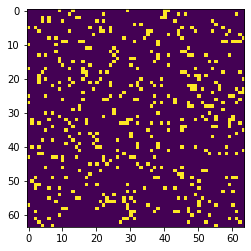

In [14]:
 plt.imshow(board.cpu())

Currently shortcomings are that there is no bounds checking for the tensors, ideally it should just ignore indices that are outof bounds.

In [6]:
def simulate_one_step(x, y, theta, move_distance, knife_half_length, board):
#     board = board.to(device)
    coords = torch.nonzero(board)
    R = torch.Tensor([[-np.sin(theta),-np.cos(theta)],[np.cos(theta),-np.sin(theta)]]).to(device)
    transformed_coords = coords.float() @ R    
    apply_at = torch.Tensor([[x,y]]).to(device) @ R
    indices_of_interest = torch.logical_and(torch.logical_and(torch.logical_and((
                              apply_at[0,0] + move_distance) > transformed_coords[:,0], 
                              transformed_coords[:,0]> apply_at[0,0]), 
                              ((apply_at[0,1]+knife_half_length) > transformed_coords[:,1])),
                              (transformed_coords[:,1]> (apply_at[0,1] - knife_half_length)))
    to_move = transformed_coords[indices_of_interest]
    to_zero = coords[indices_of_interest]
    board[to_zero[:,0], to_zero[:,1]] = False
    to_move[:,0] = (apply_at[0,0] + move_distance) 
    to_move = (to_move@ R.T).round().long()
    board[to_move[:,0], to_move[:,1]] = True
    plt.figure()
    plt.imshow(board.cpu())
#     return board

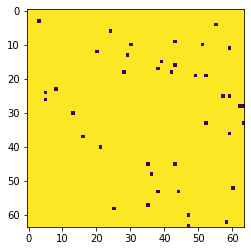

In [7]:
board = (torch.rand(board_size, board_size) > 0.01) #0.5*2*(board_size**2 - num_particles)/(board_size**2)).to(device)
plt.imshow(board.cpu())

In [8]:
simulate_one_step(32,32, np.pi/2, move_distance=20, knife_half_length=knife_half_length/3, board=board)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat2 in method wrapper_mm)

In [ ]:
simulate_one_step(32,16, theta, move_distance=10, knife_half_length=knife_half_length, board=board)

In [ ]:
simulate_one_step(32,16, -theta, move_distance=10, knife_half_length=knife_half_length, board=board)

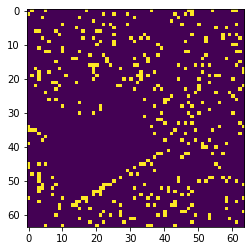

In [12]:
simulate_one_step(32,16, theta, move_distance=20, knife_half_length=knife_half_length, board=board)

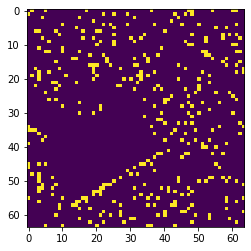

In [14]:
simulate_one_step(16,48, np.pi-theta, move_distance=5, knife_half_length=knife_half_length, board=board)

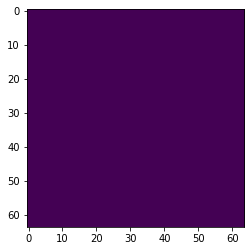

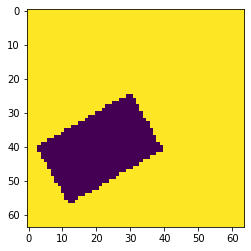

In [15]:
board = (torch.rand(board_size, board_size) > 0.0).to(device)

plt.imshow(board.cpu())

board

simulate_one_step(32,16, theta, move_distance=20, knife_half_length=knife_half_length, board=board)

